<div style="text-align: center;">
<font size='6'>DVC Data Science Club Project1</font><br><br>
<font size='5'>Topic: "Square Error"
</div>



<font size="3">
Welcome to DVC Data Sciece Club and Our Series of Projects.<br>
Our first project is going to deal with "Square Error."<br>
To imagine about what Square Error is and how we can apply this knowledge, let's think the following story.<br><br> 

Suppose we have a date set about house price of Plesant Hill, and it consists of two variable sets, 'Xs' and 'Ys'.<br>
In a set 'Xs', each x represents age of a house and<br>
In a set 'Ys', each y stands for price of a house corresponding each x.<br><br>

From that point, given a date set, we can assume there is a functional relation behind a date set<br>
and if we can find the relationship, we can also predict new price of a house when given new age of a house. <br><br>

Thus, if we want to predict output, we need to make a model, or a function like f(x) which takes an input x and outputs a reselting value.<br>

 
 
Therefore, if we can set the coefficient of the function, we can make a model to predict new price of house, which is Y, from age of a new house, which is also X. 
</font>
 





"Description"

<div style="text-align: left;">
<font size="5">1: 誤差関数に使用する公式集</font><br><br><br>
</div>

<div style="text-align: left;">
    <font size="4">①求めたい関数:</font>
    <font size="3">$$f(x) = w_0x^0 + w_1x^1 + ... + w_mx^m \\$$</font>
    <br>

    <font size="4">②求めたいパラメーター:</font>
    <font size="3">
        $$ w = 
        \begin{bmatrix}
        w_0 \\
        w_1 \\
        ... \\
        w_m
        \end{bmatrix}$$
    </font>
    <br>

    <font size="4">③パラメーターを求める公式:</font>
    <font size="3">$$w = (\Phi^T\Phi)^{-1}\Phi^Tt$$</font>
    <font size="2">
    $$(\Phi:\: called\: Phi\: and \: sometimes \: represnted\: as\:"φ" \: in \: later \: work)$$
    </font>
    <br>
    
    <font size="4">④パラメーターの精度確認:</font>
    <font size="2">(平方根平均二乗誤差)</font>
    <font size="3">
    $$Erms = \sqrt{\frac{①}{N}}$$
    </font><br><br><br>
</div>

<div style="text-align: left;">
<font size="5">2: 誤差関数に使用する変数の詳細</font><br><br><br>
</div>

<div style="text-align: left;">
    <font size="4">x : 特徴変数</font><br>
    <font size="2">　(例) 家の築年数</font><br><br>

    <font size="4">t : 目的変数</font><br>
    <font size="2">　(例) 家の価格</font><br><br>

    <font size="4">Phi or φ: パラメーターを求める公式の中で使われる</font><br>
    <font size="2">　(証明は難しいので割愛)</font><br>
    <font size="3">
        $$ \Phi = 
        \begin{bmatrix}
        x_1^0 & x_1^1 & ... & x_1^{m+1}  \\
        x_2^0 & x_2^1 & ... & x_2^{m+1}  \\
        ...   & ...   & ... & ... \\
        x_n^0 & x_n^1 & ... & x_n^{m+1}  \\
        \end{bmatrix}$$
    </font><br>
    
    <font size="4">m : パラメーターの字数</font><br><br>
    <font size="4">n : トレーニングセットの次数</font><br><br><br>
</div>

<div style="text-align: left;">
    <font size="5">3: コード実装</font><br><br>
    <font size="4">
    <pre>
Now, we are going to implement our first program "Square Error"
Let's suppose that
　　　"Xs" to be age of a house
　　　"Ys" to be price of a house corresponding to each x

and each value of Xs and Ys are summarized below the table
    </pre>
    </font>
</div>

<div>
<font size="3">
    <table style="width: 100px">
        <tr>
            <td>X (ys)</td>
            <td>Y ()</td>
        </tr>
        <tr>
            <td>10</td>
            <td>500</td>
        </tr>
        <tr>
            <td>20</td><td>300</td>
        </tr>
        <tr>
            <td>25</td>
            <td>270</td>
        </tr>
        <tr>
            <td>27</td>
            <td>290</td>
        </tr>
        <tr>
            <td>32</td>
            <td>240</td>
        </tr>
    </table>
</font><br>
</div>


In [32]:
#step0: 使用するモジュールをimportする
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
#step1-1: データを準備する
X = np.array([10, 20, 25, 27, 32])
Y = np.array([500, 300, 270, 290, 240])
N = len(X)

Now, <br>
   $$X = 
   \begin{bmatrix}
   10 & 20 & 25 & 27 & 32  \\
   \end{bmatrix}$$
   
  $$Y = 
   \begin{bmatrix}
   500 & 300 & 270 & 290 & 240  \\
   \end{bmatrix}$$
   
  $$N = 5$$

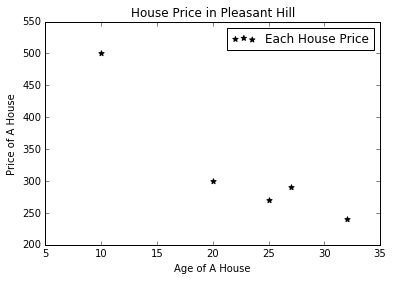

In [11]:
#step1-2: データを可視化する
plt.scatter(X,Y, label='Each House Price', color='k', marker = '*', s = 30)
plt.xlabel('Age of A House')
plt.ylabel('Price of A House')
plt.title('House Price in Pleasant Hill')
plt.legend()
plt.show()

In [12]:
#step2: mの次数を決める
#注意 → m = 4の多項式の最大次数は3になる
m = 4

In [13]:
#step3-1: small_φを作る
phi = []
for i in range(m):
    tmp = [] 
    for s in X:
        tmp.append(s ** i)
    phi.append(tmp)
print('phi')
print(phi)

phi
[[1, 1, 1, 1, 1], [10, 20, 25, 27, 32], [100, 400, 625, 729, 1024], [1000, 8000, 15625, 19683, 32768]]


The reason that we used "for loop" twice is we want to make phi or 2-dimentional array.<br>

<div>
So, in the first loop, i represents as<br>
$$ i_0 = 0 \\
   i_1 = 1 \\
   ... \\
   i_{m+1} = m+1 \\$$
</div>

and, in the second, s represents as<br>
$$ s_0 = 10 \\
   s_1 = 20 \\
   s_2 = 25 \\
   s_3 = 27 \\
   s_4 = 32 \\$$
   
   
to help you understand and visualize it, we will show the first, second, and last arrays caculation below...<br>
$$ phi = 
   \begin{bmatrix}
   s_0^{i_0} = 10^0 & s_1^{i_0} = 20^0 & s_2^{i_0} = 25^0 & s_3^{i_0} = 27^0 & s_4^{i_0} = 32^0 \\
   s_0^{i_1} = 10^1 & s_1^{i_1} = 20^1 & s_2^{i_1} = 25^1 & s_3^{i_1} = 27^1 & s_4^{i_1} = 32^1 \\
   ... \\
   s_0^{i_3} = 10^3 & s_1^{i_3} = 20^3 & s_2^{i_3} = 25^3 & s_3^{i_3} = 27^3 & s_4^{i_3} = 32^3 \\
   \end{bmatrix}
$$


 


Now, we get phi as<br>
$$phi =
   \begin{bmatrix}
   1 & 1 & 1 & 1 & 1  \\
   10 & 20 & 25 & 27 & 32  \\
   100 & 400 & 625 & 729 & 1024 \\
   1000 & 8000 & 15625 & 19683 & 32768  \\
   \end{bmatrix}$$<br>
   
but, we want to make phi transpose for the convinience of our future calculation.

In [17]:
#step3-2: big_φを作る
PHI = np.array(phi).T #make phi transpose
print('PHI =')
print(PHI)

PHI =
[[    1    10   100  1000]
 [    1    20   400  8000]
 [    1    25   625 15625]
 [    1    27   729 19683]
 [    1    32  1024 32768]]


In [23]:
#step4: 公式③からparameter "w" を求める 
tmp = np.linalg.inv(np.dot(PHI.T, PHI))
WS = np.dot(np.dot(tmp, PHI.T), Y)
print('Ws =')
print(WS)

Ws =
[  1.26651210e+03  -1.17876615e+02   4.78060018e+00  -6.55611824e-02]


From the result of step4, we got the values of the parameters, which are also coefficient of our function.<br>
So, if we substitute the reslut for parameter 'WS', f(x) can be represented as

<font size="3">$$f(x) = 1.27x^0 - 1.18x^1 + 4.78x^2 - 6.56x^3$$</font><br>

or simply<br>

<font size="3">$$f(x) = 1.27 - 1.18x + 4.78x^2 - 6.56x^3$$</font><br>


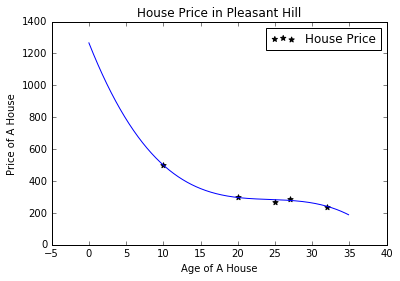

In [34]:
#step5: f(x)をプロット

#f(x)の曲線を滑らかに描くために,今回はx=0からx=35の範囲で、0.1刻みに値をとる
XX = np.arange(0,35,0.1)

#各XXの値を関数f(x)に代入して,XXに対応するYYの値を算出する
YY = [] 
for i in XX:
    tmp = 0
    for s,k in enumerate(WS):
        tmp += k * (i**s)
    YY.append(tmp)

plt.plot(XX,YY,color='b')
plt.scatter(X,Y, label='House Price', color='k', marker = '*', s = 30)
plt.xlabel('Age of A House')
plt.ylabel('Price of A House')
plt.title('House Price in Pleasant Hill')
plt.legend()
plt.show()

In [35]:
#step6: パラメーターの精度確認(平均的にどれくらいもとの値からずれているのかをしらべる)
def f(X):
    y = 0
    for i, w in enumerate(WS):
        y += w * (X ** i)
    #print('f(x) =', y)
    return y

ERMS = 0
for x, y in zip(X,Y):
    #print('x =', x, 'y =', y)
    ERMS += 0.5 * ((y - f(x))**2)
    #print(ERMS)

from math import sqrt
ERMS = sqrt(ERMS/N)
print(ERMS)

5.631764499168858
